In [30]:
import scipy.sparse as spsp
import numpy as np
from scipy.sparse.linalg import spsolve
import numpy as np
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt


In [31]:
"""
Created on Tue Sep 14 17:09:35 2018

@author: Leidong Xu(Alex)

A simple 2d heat conduction with fixed boundary condition, 
which is very similar to my multigrid possion solver I built before. 
"""

'\nCreated on Tue Sep 14 17:09:35 2018\n\n@author: Leidong Xu(Alex)\n'

In [60]:
# initialize geometry and boundary condition
N  = 100
Tl = 0
Tr = 2
Tt = 3
Tb = 0

In [61]:
#matrix in Euclidean form
nblock = N - 2
Bdiag = -4 * spsp.eye(nblock)
Bupper = spsp.diags([1] * (nblock - 1), 1)
Blower = spsp.diags([1] * (nblock - 1), -1)
B = Bdiag + Bupper + Blower
blst = [B] * nblock

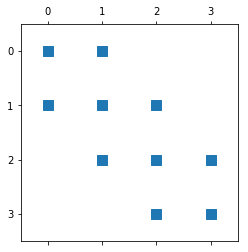

In [57]:
plt.spy(B)
plt.show()

In [62]:
# implement the submatrix to build an explicit sparse matrix
A = spsp.block_diag(blst)
Dupper = spsp.diags(np.ones(nblock * (nblock - 1)), nblock)
Dlower = spsp.diags(np.ones(nblock * (nblock - 1)), -nblock)
A += Dupper + Dlower

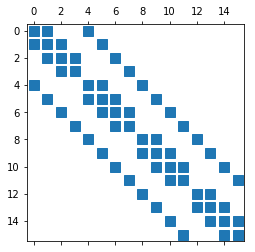

In [59]:
plt.spy(A)
plt.show()

In [63]:
b = np.zeros(nblock**2)
b = b.reshape((nblock, nblock))
b[0,:] += -Tt
b[nblock-1,:] += -Tb
b[:,0] += -Tl
b[:,nblock-1] += -Tr
b = b.flatten()

In [64]:
u  = spsolve(A, b)

In [65]:
def org(T):
    N = T.shape[0] + 2
    Tfull = np.zeros((N,N))
    Tfull[0,:] = Tt
    Tfull[N-1,:] = Tb
    Tfull[:,0] = Tl
    Tfull[:,N-1] = Tr
    Tfull[1:-1, 1:-1] = T
    return Tfull

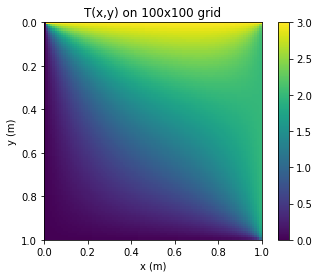

In [66]:
T = u.reshape((nblock, nblock))
Tfull = org(T)
x = y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x,y)
plt.figure(9)
plt.clf()
plt.pcolor(X, Y, Tfull)
plt.axis('scaled')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.gca().invert_yaxis()
plt.title('T(x,y) on %dx%d grid' % (N,N))
plt.show()